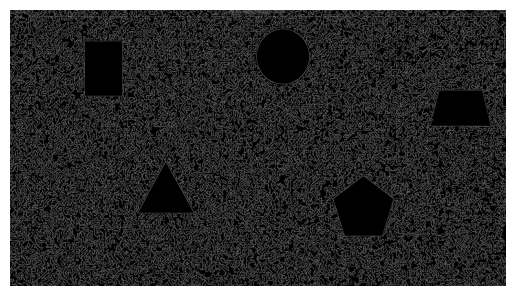

In [40]:
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import os
import matplotlib.pyplot as plt


red = (86, 45, 143)
white = (212, 213, 211)
green = (64, 90, 58)
blue = (56, 22, 1)


img = cv2.imread('StaticHard24.png')

# 1. Canny Edge Detection
edges = cv2.Canny(img, 0, 50, apertureSize=3)

# Convert BGR2RGB and show
rgbTemp = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)
plt.imshow(rgbTemp)
plt.axis('off')
plt.show()


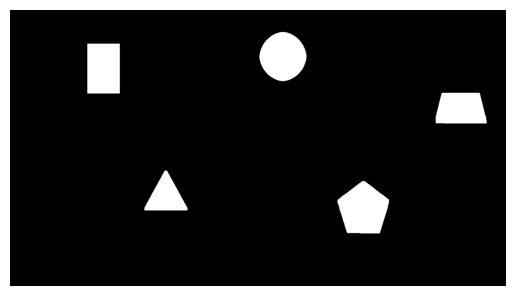

In [58]:
# 2. Dilate and erode to get clean shapes
kernel = np.ones((15, 15), np.uint8)
dilated_img = cv2.dilate(edges, kernel, iterations=3)
eroded = cv2.erode(dilated_img, kernel, iterations=1)
inverted_img = cv2.bitwise_not(eroded)

# Convert BGR2RGB and show
rgbTemp = cv2.cvtColor(inverted_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgbTemp)
plt.axis('off')
plt.show()

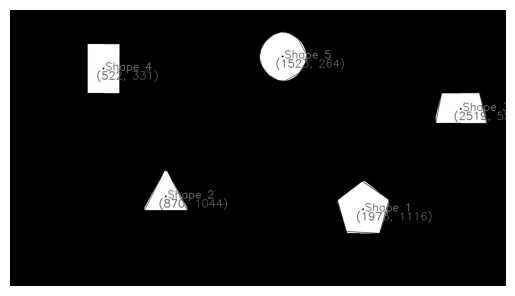

In [63]:
# Find contours
contours, hierarchy = cv2.findContours(inverted_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

filtered_img = np.zeros_like(inverted_img)
area_threshold = 1000

for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if area > area_threshold:
        cv2.drawContours(filtered_img, [contour], -1, (255), thickness=cv2.FILLED)

        perimeter = cv2.arcLength(contour, True)
        epsilon = 0.01 * perimeter  # roughly approximating the perimeter for cleaner edges
        approx = cv2.approxPolyDP(contour, epsilon, True)

        cv2.drawContours(filtered_img, [approx], 0, (0, 255, 0), 2)

        # Calculate and draw the center for reference
        M = cv2.moments(approx)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.circle(filtered_img, (cX, cY), 5, (0, 0, 255), -1)
            cv2.putText(filtered_img, f"Shape {i+1}", (cX + 10, cY + 10), cv2.FONT_HERSHEY_SIMPLEX, 2.0, red, 3)
            cv2.putText(filtered_img, f"Shape {i+1}", (cX + 10, cY + 10), cv2.FONT_HERSHEY_SIMPLEX, 2.0, white, 1)

        cv2.putText(filtered_img, f"({cX}, {cY})", (cX - 40, cY + 60), cv2.FONT_HERSHEY_SIMPLEX, 2.0, blue, 3)
        cv2.putText(filtered_img, f"({cX}, {cY})", (cX - 40, cY + 60), cv2.FONT_HERSHEY_SIMPLEX, 2.0, white, 1)


# Convert BGR2RGB and show
rgbTemp = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgbTemp)
plt.axis('off')
plt.show()